In [42]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Risk Free Rate
Interpolation of risk free rate using cubic spline.

## Japan

In [43]:
df_JP = pd.read_csv('Data/Risk Free Rate/JP_RF Rate_01092023.csv')
df_JP.head()

,Tenor,Maturity Date,Days,Yield
0,1M,25/9/2023,21,-0.127
1,3M,27/11/2023,63,-0.223
2,6M,13/2/2024,126,-0.152
3,1Y,1/9/2024,252,-0.085
4,2Y,1/9/2025,504,0.018


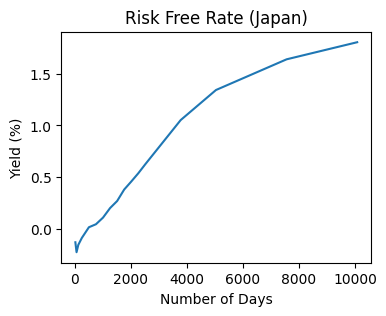

In [44]:
plt.figure(figsize=(4,3))
plt.plot(df_JP['Days'],df_JP['Yield'])
plt.xlabel('Number of Days')
plt.ylabel('Yield (%)')
plt.title('Risk Free Rate (Japan)')
plt.show()

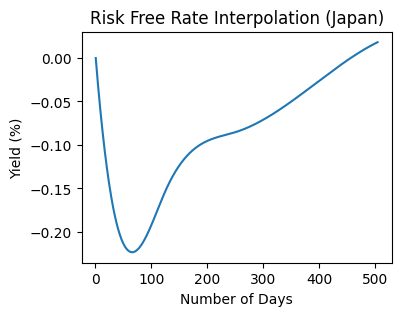

In [45]:
cs_JP = CubicSpline(df_JP['Days'],df_JP['Yield'])
x = np.arange(1,505)

plt.figure(figsize=(4,3))
plt.plot(x,cs_JP(x))
plt.xlabel('Number of Days')
plt.ylabel('Yield (%)')
plt.title('Risk Free Rate Interpolation (Japan)')
plt.show()

## Japan, the US & Hong Kong

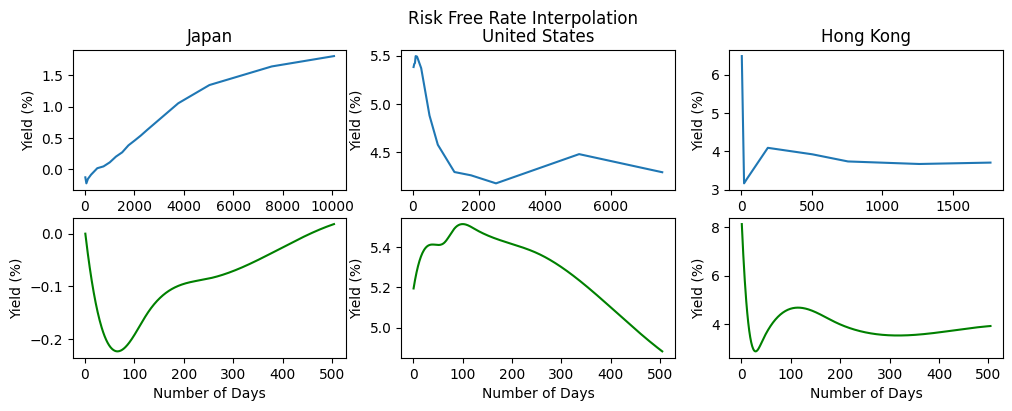

In [52]:
df_US = pd.read_csv('Data/Risk Free Rate/US_RF Rate_01092023.csv')
df_HK = pd.read_csv('Data/Risk Free Rate/HK_RF Rate_01092023.csv')
cs_US = CubicSpline(df_US['Days'],df_US['Yield'])
cs_HK = CubicSpline(df_HK['Days'],df_HK['Yield'])

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,4))
fig.suptitle('Risk Free Rate Interpolation')

axs[0,0].plot(df_JP['Days'],df_JP['Yield'])
axs[0,0].set_title('Japan')
axs[1,0].plot(x,cs_JP(x),color='g')
axs[0,1].plot(df_US['Days'],df_US['Yield'])
axs[0,1].set_title('United States')
axs[1,1].plot(x,cs_US(x),color='g')
axs[0,2].plot(df_HK['Days'],df_HK['Yield'])
axs[0,2].set_title('Hong Kong')
axs[1,2].plot(x,cs_HK(x),color='g')

for ax in axs.flat:
    ax.set(xlabel='Number of Days', ylabel='Yield (%)')
